In [1]:
import rl.environments
import yaml
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv
import rl.helpers
import gym
from stable_baselines.gail import generate_expert_traj
from stable_baselines.gail import ExpertDataset
from stable_baselines import PPO2
import pathlib
from os.path import join
from stable_baselines.common import make_vec_env
from stable_baselines.common.callbacks import EvalCallback

path = 'D:/Drive/git/RL/'
env_name = 'ConveyorEnv121'
subdir = '20210102_2000'

config_path = join(path, 'rl', 'config','{}.yml'.format(env_name))
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

env_obj = getattr(rl.environments, env_name)
env = env_obj(config)

def decode_binary(binary_array):
    return [int("".join([str(n) for n in [int(l) for l in list(binary_array[i-2:i])]]),2) for i in range(2,len(binary_array)+2,2)]

def decode_action(order_type, goal):
    return (order_type-1 )* env.amount_of_gtps + goal

def dummy_expert(obs):
    """
    Based on observation , heuristic determines the policy  ( can only take observation [4, 15, 16, 17, 18])

    :param _obs: (np.ndarray) Current observation
    :return: (np.ndarray) action taken by the expert
    """
    threshold = 15
    
    demands = decode_binary(obs[:2*env.amount_of_gtps*env.in_que_observed])
    queue_demands = [demands[i*env.in_que_observed: env.in_que_observed +i*env.in_que_observed] for i in range(env.amount_of_gtps)]
    W_rpt = obs[2*env.amount_of_gtps*env.in_que_observed:2*env.amount_of_gtps*env.in_que_observed+env.amount_of_gtps]
    max_time_w = 6 if env.amount_of_outputs==1 else 30 if env.amount_of_outputs==2 else 60
    W_rpt = W_rpt * max_time_w
    
    
    Q_rpt = obs[2*env.amount_of_gtps*env.in_que_observed+env.amount_of_gtps:2*env.amount_of_gtps*env.in_que_observed+env.amount_of_gtps*2]
    max_time_q = max_time_w*env.gtp_buffer_length
    Q_rpt = Q_rpt * max_time_q
    
    P_rpt = obs[2*env.amount_of_gtps*env.in_que_observed+env.amount_of_gtps*2:2*env.amount_of_gtps*env.in_que_observed+env.amount_of_gtps*3]
    P_rpt = P_rpt*env.pipeline_length
    
    in_pipe = obs[2 * env.amount_of_gtps * env.in_que_observed + env.amount_of_gtps * 3:2 * env.amount_of_gtps * env.in_que_observed + env.amount_of_gtps * 4]
    #in_pipe = obs[-env.amount_of_gtps:]
    in_pipe = in_pipe*env.pipeline_length
    in_pipe = in_pipe.astype(int)
    
    actions_list = []
    for workstation in range(env.amount_of_gtps)[::-1]:
        total_rpt = W_rpt[workstation] + Q_rpt[workstation] + P_rpt[workstation]
        total_pipe = env.pipeline_length + env.gtp_buffer_length + workstation * 4 + 2
        
        if total_rpt - total_pipe < threshold:
            try:
                current_demand = queue_demands[workstation][in_pipe[workstation]]
                actions_list.append((current_demand, workstation + 1))
            except:
                pass
    
    try:
        order_type, goal = actions_list[0]
        actions_list = actions_list[1:]

    except:
        order_type, goal = 0, 0
    
    if order_type ==0 and goal == 0:
        action = 0
        
    else:
        action = decode_action(order_type, goal)

    
    return action

## Generate Data based on heuristic for pre-training
# Data will be saved in a numpy archive named `heuristic_expert.npz`


{'1': 32, '2': 29}

False
{'1': 6, '2': 6}


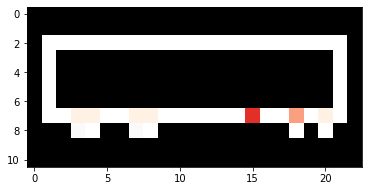

In [26]:
env.reset()
print(env.terminate)
print(env.W_times)
env.render_plt()

In [2]:
env.r

IndexError: index 14 is out of bounds for axis 0 with size 11

0
{0: 0}
items processed: 82
0
{0: 0}
items processed: 82
0
{0: 0}
items processed: 82
0
{0: 0}
items processed: 82
0
{0: 0}
items processed: 83
0
{0: 0}
items processed: 83
0
{0: 0}
items processed: 83
0
{0: 0}
items processed: 83
0
{0: 0}
items processed: 83
0
{0: 0}
items processed: 83
0
{0: 0}
items processed: 83
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items processed: 84
0
{0: 0}
items

{0: 0}
items processed: 99
0
{0: 0}
items processed: 99
0
{0: 0}
items processed: 99
0
{0: 0}
items processed: 100
0
{0: 0}
items processed: 100
0
{0: 0}
items processed: 100
0
{0: 0}
items processed: 100
0
{0: 0}
items processed: 100
0
{0: 0}
items processed: 100
0
{0: 0}
items processed: 100
0
{0: 0}
items processed: 101
0
{0: 0}
items processed: 101
0
{0: 0}
items processed: 101
0
{0: 0}
items processed: 101
0
{0: 0}
items processed: 101
0
{0: 0}
items processed: 101
0
{0: 0}
items processed: 101
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
1
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items processed: 102
0
{0: 0}
items 

{0: 272}
items processed: 104
0
{0: 273}
items processed: 104
0
{0: 274}
items processed: 104
0
{0: 275}
items processed: 104
0
{0: 276}
items processed: 104
0
{0: 277}
items processed: 104
0
{0: 278}
items processed: 104
0
{0: 279}
items processed: 104
0
{0: 280}
items processed: 104
0
{0: 281}
items processed: 104
0
{0: 282}
items processed: 104
0
{0: 283}
items processed: 104
0
{0: 284}
items processed: 104
0
{0: 285}
items processed: 104
0
{0: 286}
items processed: 104
0
{0: 287}
items processed: 104
0
{0: 288}
items processed: 104
0
{0: 289}
items processed: 104
0
{0: 290}
items processed: 104
0
{0: 291}
items processed: 104
0
{0: 292}
items processed: 104
0
{0: 293}
items processed: 104
0
{0: 294}
items processed: 104
0
{0: 295}
items processed: 104
0
{0: 296}
items processed: 104
0
{0: 297}
items processed: 104
0
{0: 298}
items processed: 104
0
{0: 299}
items processed: 104
0
{0: 300}
items processed: 104
0
{0: 301}
items processed: 104
0
{0: 302}
items processed: 104
0
{0: 303}

{0: 580}
items processed: 104
0
{0: 581}
items processed: 104
0
{0: 582}
items processed: 104
0
{0: 583}
items processed: 104
0
{0: 584}
items processed: 104
0
{0: 585}
items processed: 104
0
{0: 586}
items processed: 104
0
{0: 587}
items processed: 104
0
{0: 588}
items processed: 104
0
{0: 589}
items processed: 104
0
{0: 590}
items processed: 104
0
{0: 591}
items processed: 104
0
{0: 592}
items processed: 104
0
{0: 593}
items processed: 104
0
{0: 594}
items processed: 104
0
{0: 595}
items processed: 104
0
{0: 596}
items processed: 104
0
{0: 597}
items processed: 104
0
{0: 598}
items processed: 104
0
{0: 599}
items processed: 104
0
{0: 600}
items processed: 104
0
{0: 601}
items processed: 104
0
{0: 602}
items processed: 104


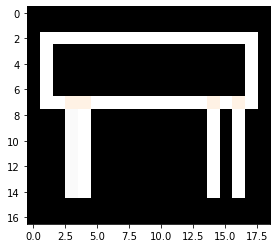

In [159]:
for i in range(1000):
    print(dummy_expert(env.make_observation()))
    env.step(dummy_expert(env.make_observation()))
    print(env.idle_times_operator)
    print('items processed: {}'.format(env.items_processed))
env.render_plt()

In [395]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

def random_distribution_gen(var_in):
    if var_in == 0:
        return 0
    else:
        lower = round(0.5*var_in)
        upper = round(1.8*var_in)
        scale = 1 if var_in ==6 else 5 if var_in ==30 else 10 if var_in == 60 else 5
        x = np.arange(-lower, lower)
        xU, xL = x + 0.5, x - 0.5 
        prob = ss.norm.cdf(xU, scale = scale) - ss.norm.cdf(xL, scale = scale)
        prob = prob / prob.sum() #normalize the probabilities so their sum is 1
        return np.random.choice(x, p = prob) + var_in

In [396]:
random_distribution_gen(0)

0

In [2]:
## Generate Data based on heuristic for pre-training
# Data will be saved in a numpy archive named `heuristic_expert.npz`
env.reset()
generate_expert_traj(dummy_expert, 'heuristic_expert', env, n_episodes=100)

actions (71552, 1)1483, R: 0.0000
obs (71552, 28)
rewards (71552,)
episode_returns (50,)
episode_starts (71552,)


{'actions': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]), 'obs': array([[1., 0., 1., ..., 6., 2., 1.],
        [1., 0., 1., ..., 6., 1., 1.],
        [1., 0., 1., ..., 6., 1., 1.],
        ...,
        [0., 1., 1., ..., 6., 0., 1.],
        [0., 1., 1., ..., 6., 0., 1.],
        [0., 1., 1., ..., 6., 0., 1.]]), 'rewards': array([10.,  0.,  0., ...,  0.,  0.,  0.]), 'episode_returns': array([ 365.,  535.,  520.,  810.,  525.,  420.,  285., -130.,  425.,
         650.,  370.,  520.,  520.,  965.,  430.,  365.,  590.,  570.,
         405.,  620.,  475.,  530.,  520.,  470.,  535.,  840.,  370.,
         530.,  580.,  330.,  490.,   35.,  465.,  250.,  515.,  365.,
         635.,  240.,  515.,  410.,  555.,  795.,  335.,  620.,  675.,
         630.,  720.,  445.,  650.,  485.]), 'episode_starts': array([ True, False, False, ..., False, False, False])}